<a href="https://colab.research.google.com/github/sheku846/Deep_learning_Classification/blob/main/classification_cifar100_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.1
)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=30,
                    validation_data=(test_images, test_labels))


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 4s 14ms/step - loss: 2.2857 - accuracy: 0.4018
Test accuracy: 40.18%


In [14]:
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

predictions = model.predict(sample_images)

true_labels = [np.argmax(label) for label in sample_labels]
predicted_labels = [np.argmax(prediction) for prediction in predictions]

1/1 [==============================] - 0s 18ms/step


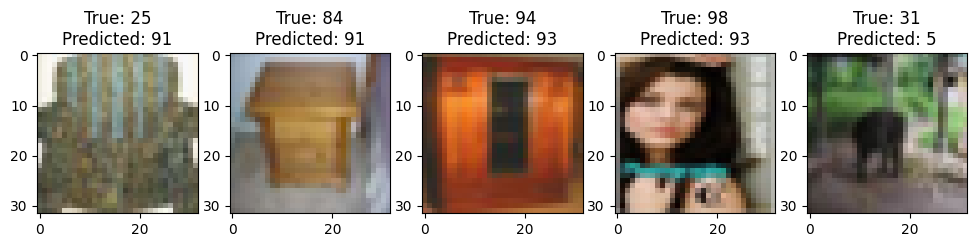

In [15]:
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('on')

plt.show()